In [1]:
# PROBLEM 7.1-1
# import
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

# define matrices inital wave transfer matrices
var('M_n1, M_n2, M_n3, n1, n2, n3, lambd, d, i')

M_n1 = 1/(2*n2)*Matrix([[n2+n1, n2-n1], [n2-n1, n2+n1]])
M_n2 = Matrix([[exp((-i*2*pi*n2*d)/lambd), 0], [0, exp((i*2*pi*n2*d)/lambd)]])
M_n3 = 1/(2*n3)*Matrix([[n3+n2, n3-n2], [n3-n2, n3+n2]])

# calculate final wave transfer matrix
M = M_n3*M_n2*M_n1

# convert the wave transfer matrix to a scattering matrix
t12 = M[0]*M[3] - M[1]*M[2]
t21 = 1
r12 = -M[2]
r21 = M[1]

S = 1/M[3]*Matrix([[t12, r21], [r12, t21]])

print('The B element of the M matrix (the reflectance from the dialectric) is:') 
M[2]

The B element of the M matrix (the reflectance from the dialectric) is:


(-n1 + n2)*(n2 + n3)*exp(2*pi*d*i*n2/lambd)/(4*n2*n3) + (n1 + n2)*(-n2 + n3)*exp(-2*pi*d*i*n2/lambd)/(4*n2*n3)

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


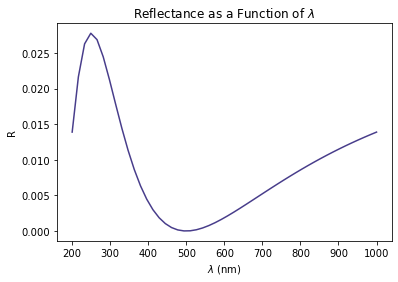

In [2]:
# create a function from the reflection coefficient
def reflect(lambd):
    r = -((-n1 + n2)*(n2 + n3)*np.exp(2*np.pi*d*i*n2/lambd)/(4*n2*n3) 
    + (n1 + n2)*(-n2 + n3)*np.exp(-2*np.pi*d*i*n2/lambd)/(4*n2*n3))
    return r

# define variables and plot
i = 1j
n1 =1.0
n3 =1.5
n2 =np.sqrt(n1*n3)
d = 500/(4*n2)

lambd = np.linspace(200, 1000)

plt.plot(lambd, reflect(lambd)**2, color = 'darkslateblue')
plt.title('Reflectance as a Function of $\lambda$')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('R');

The second refractive index is sqrt(n1*n3) = sqrt(1.5), and the distance between the dialctrics is 500/(4*n2). Requiring that n2 = sqrt(n1*n3) and that the distance be a quarter wavelength in vacuum makes the actual distance d = x/(4*n2). Substituting these values into the reflectance coeffcicient derived from the M matrix sets x as the zero point of reflectance. Here, the system was designed to have total transmission at 500 nm, and this is shown in the plot "Reflectance as a Function of Wavelengtgh'.

In [1]:
# RECREATE FIGURE 7.1-5
# import
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

# define the wave transfer matrices
var('i, n1, d, lambd, r')

free_space = Matrix([[exp((-i*2*pi*n1*d)/lambd), 0], [0, exp((i*2*pi*n1*d)/lambd)]])
mirror = (1/(sqrt(1-r**2)))*Matrix([[1, i*r], [-i*r, 1]])

# calculate final wave transfer matrix
M = mirror*free_space*mirror

# convert the wave transfer matrix to a scattering matrix
t12 = M[0]*M[3] - M[1]*M[2]
t21 = 1
r12 = -M[2]
r21 = M[1]

S = 1/M[3]*Matrix([[t12, r21], [r12, t21]])

print('The t12 element of the S matrix (the transmisson) is:') 
S[0]

The t12 element of the S matrix (the transmisson) is:


(-(-i*r*exp(2*pi*d*i*n1/lambd)/(1 - r**2) - i*r*exp(-2*pi*d*i*n1/lambd)/(1 - r**2))*(i*r*exp(2*pi*d*i*n1/lambd)/(1 - r**2) + i*r*exp(-2*pi*d*i*n1/lambd)/(1 - r**2)) + (-i**2*r**2*exp(-2*pi*d*i*n1/lambd)/(1 - r**2) + exp(2*pi*d*i*n1/lambd)/(1 - r**2))*(-i**2*r**2*exp(2*pi*d*i*n1/lambd)/(1 - r**2) + exp(-2*pi*d*i*n1/lambd)/(1 - r**2)))/(-i**2*r**2*exp(-2*pi*d*i*n1/lambd)/(1 - r**2) + exp(2*pi*d*i*n1/lambd)/(1 - r**2))

/var/folders/65/h4j8lnfx7rv6bbmyxrt4f97m0000gn/T/ipykernel_63734/3754962723.py:17: RuntimeWarning: divide by zero encountered in true_divide
  lambd = (3.0*10**8)/(2*F)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


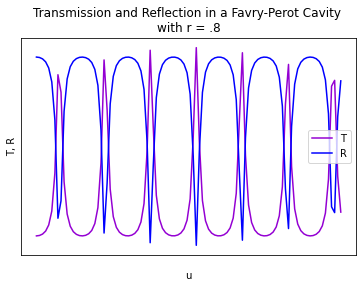

In [12]:
# turn the transmission coefficient into a function
def trans(lambd):
    y = (-(-i*r*np.exp(2*np.pi*d*i*n1/lambd)/(1 - r**2) 
        - i*r*np.exp(-2*np.pi*d*i*n1/lambd)/(1 - r**2))*(i*r*np.exp(2*np.pi*d*i*n1/lambd)/(1 - r**2) 
        + i*r*np.exp(-2*np.pi*d*i*n1/lambd)/(1 - r**2)) + (-i**2*r**2*np.exp(-2*np.pi*d*i*n1/lambd)/(1 - r**2) 
        + np.exp(2*np.pi*d*i*n1/lambd)/(1 - r**2))*(-i**2*r**2*np.exp(2*np.pi*d*i*n1/lambd)/(1 - r**2) 
        + np.exp(-2*np.pi*d*i*n1/lambd)/(1 - r**2)))/(-i**2*r**2*np.exp(-2*np.pi*d*i*n1/lambd)/(1 - r**2) 
        + np.exp(2*np.pi*d*i*n1/lambd)/(1 - r**2))
    return y

# define variables 
n1 = 1
r = 0.8
d = 500
i = 1j
F = np.linspace(0, 1*10**6, 100)
lambd = (3.0*10**8)/(2*F)

# calcualte the transmission and reflection
T = trans(lambd)*np.conj(trans(lambd))
R = 1 - T

# plot
plt.plot(F, T, color = 'darkviolet',label = 'T')
plt.plot(F, R, color = 'blue', label = 'R')
plt.title('Transmission and Reflection in a Favry-Perot Cavity \nwith r = .8', size = 12)
plt.xlabel('\nu')
plt.xticks([])
plt.ylabel('T, R')
plt.yticks([])
plt.legend();

In [2]:
# RECREATE FIGURE 7.1-6
# import
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

# create wave transfer matrices
var('n1, n2, lambd, d, i')

M_n1 = 1/(2*n2)*Matrix([[n2+n1, n2-n1], [n2-n1, n2+n1]])
M_n2 = Matrix([[exp((-i*2*pi*n2*d)/lambd), 0], [0, exp((i*2*pi*n2*d)/lambd)]])
M_n3 = 1/(2*n1)*Matrix([[n1+n2, n1-n2], [n1-n2, n1+n2]])

# calculate final wave transfer matrix
M = M_n3*M_n2*M_n1

# convert the wave transfer matrix to a scattering matrix
t12 = M[0]*M[3] - M[1]*M[2]
t21 = 1
r12 = -M[2]
r21 = M[1]

S = 1/M[3]*Matrix([[t12, r21], [r12, t21]])
print('The t12 element of the S matrix (the transmisson) is:') 
S[0]

The t12 element of the S matrix (the transmisson) is:


(((-n1 + n2)*(n1 - n2)*exp(-2*pi*d*i*n2/lambd)/(4*n1*n2) + (n1 + n2)**2*exp(2*pi*d*i*n2/lambd)/(4*n1*n2))*((-n1 + n2)*(n1 - n2)*exp(2*pi*d*i*n2/lambd)/(4*n1*n2) + (n1 + n2)**2*exp(-2*pi*d*i*n2/lambd)/(4*n1*n2)) - ((-n1 + n2)*(n1 + n2)*exp(-2*pi*d*i*n2/lambd)/(4*n1*n2) + (n1 - n2)*(n1 + n2)*exp(2*pi*d*i*n2/lambd)/(4*n1*n2))*((-n1 + n2)*(n1 + n2)*exp(2*pi*d*i*n2/lambd)/(4*n1*n2) + (n1 - n2)*(n1 + n2)*exp(-2*pi*d*i*n2/lambd)/(4*n1*n2)))/((-n1 + n2)*(n1 - n2)*exp(-2*pi*d*i*n2/lambd)/(4*n1*n2) + (n1 + n2)**2*exp(2*pi*d*i*n2/lambd)/(4*n1*n2))

/var/folders/65/h4j8lnfx7rv6bbmyxrt4f97m0000gn/T/ipykernel_63753/36529779.py:19: RuntimeWarning: divide by zero encountered in true_divide
  lambd = (3.0*10**8)/(2*F)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


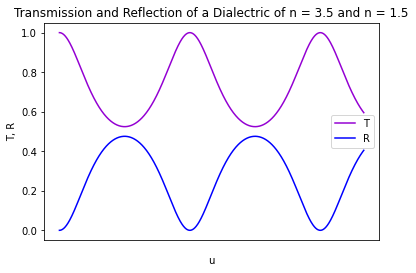

In [3]:
def trans(lambd):
    y = (((-n1 + n2)*(n1 - n2)*np.exp(-2*np.pi*d*i*n2/lambd)/(4*n1*n2) 
        + (n1 + n2)**2*np.exp(2*np.pi*d*i*n2/lambd)/(4*n1*n2))*((-n1 
        + n2)*(n1 - n2)*np.exp(2*np.pi*d*i*n2/lambd)/(4*n1*n2) 
        + (n1 + n2)**2*np.exp(-2*np.pi*d*i*n2/lambd)/(4*n1*n2)) 
        - ((-n1 + n2)*(n1 + n2)*np.exp(-2*np.pi*d*i*n2/lambd)/(4*n1*n2) 
        + (n1 - n2)*(n1 + n2)*np.exp(2*np.pi*d*i*n2/lambd)/(4*n1*n2))*((-n1 + n2)*(n1 
        + n2)*np.exp(2*np.pi*d*i*n2/lambd)/(4*n1*n2) 
        +(n1 - n2)*(n1 + n2)*np.exp(-2*np.pi*d*i*n2/lambd)/(4*n1*n2)))/((-n1 + n2)*(n1 
        - n2)*np.exp(-2*np.pi*d*i*n2/lambd)/(4*n1*n2) + (n1 + n2)**2*np.exp(2*np.pi*d*i*n2/lambd)/(4*n1*n2))
    return y

# define variables 
n1 = 1.5
n2 = 3.5
d = 500
i = 1j
F = np.linspace(0, 1*10**5, 1000)
lambd = (3.0*10**8)/(2*F)

# calcualte the transmission and reflection
T = trans(lambd)*np.conj(trans(lambd))
R = 1 - T

# plot
plt.plot(F, T, color = 'darkviolet',label = 'T')
plt.plot(F, R, color = 'blue', label = 'R')
plt.title('Transmission and Reflection of a Dialectric of n = 3.5 and n = 1.5', size = 12)
plt.xlabel('\nu')
plt.xticks([])
plt.ylabel('T, R')
plt.legend();

/var/folders/65/h4j8lnfx7rv6bbmyxrt4f97m0000gn/T/ipykernel_63753/780191519.py:38: RuntimeWarning: divide by zero encountered in true_divide
  lambd = (3.0*10**8)/(2*F)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


([], [])

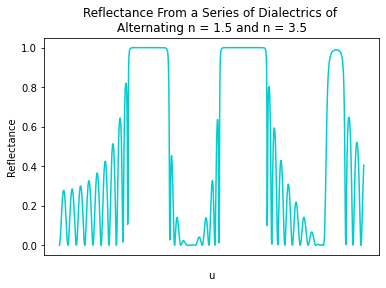

In [13]:
# RECREATE FIGURE 7.1-11
# import
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

# define wave transfer matrices
var('i, n1, n2, d1, d2, lambd')

free_space_n1 = Matrix([[exp((-i*2*pi*n1*d1)/lambd), 0], [0, exp((i*2*pi*n1*d1)/lambd)]])
dia_n1n2  = 1/(2*n2)*Matrix([[n2+n1, n2-n1], [n2-n1, n2+n1]])
free_space_n2 = Matrix([[exp((-i*2*pi*n2*d2)/lambd), 0], [0, exp((i*2*pi*n2*d2)/lambd)]])
dia_n2n1 = 1/(2*n1)*Matrix([[n1+n2, n1-n2], [n1-n2, n1+n2]])

# calculate final wave transfer matrix
M = dia_n2n1*free_space_n2*dia_n1n2*free_space_n1
M10 = np.linalg.matrix_power(M, 10)

# convert the wave transfer matrix to a scattering matrix
t12 = M10[0][0]*M10[1][1] - M10[0][1]*M10[1][0]
t21 = 1
r12 = -M10[1][0]
r21 = M10[0][1]

S = 1/M10[1][1]*Matrix([[t12, r21], [r12, t21]])

# turn the symbolic matrix into a numeric matrix
f = lambdify(['i, n1, n2, d1, d2, lambd'], S[0], np)

# define variables

i = 1j
n1 = 1.5
n2 = 3.5
d1 = 500
d2 = 500
F = np.linspace(0, 1*10**5, 1000)
lambd = (3.0*10**8)/(2*F)

# calculate transmittance and reflectance
T = f(i, n1, n2, d1, d2, lambd)*np.conj(f(i, n1, n2, d1, d2, lambd))
R = 1 - T

# plot
plt.plot(F, R, color = 'darkturquoise')
plt.title('Reflectance From a Series of Dialectrics of \nAlternating n = 1.5 and n = 3.5'
          , size = 12)
plt.ylabel('Reflectance')
plt.xlabel('\nu')
plt.xticks([])
#plt.xlim(480, 810);

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


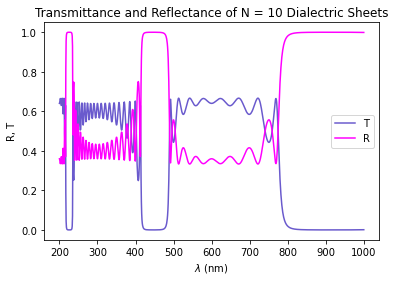

In [5]:
# PROBLEM 7.1-6
# import 
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

#prop air, dia air-n1, (prop n1, dia n1n2, prop n2, dia n2n1)^10, dia n2 sub, prop sub

# define wave transfer matrices
var('na, n1, n2, ns, d, d1, d2, lambd, i')

free_space_na = Matrix([[exp((-i*2*pi*na*d)/lambd), 0], [0, exp((i*2*pi*na*d)/lambd)]])
dia_nan1  = 1/(2*n1)*Matrix([[n1+na, n1-na], [n1-na, n1+na]])
free_space_n1 = Matrix([[exp((-i*2*pi*n1*d1)/lambd), 0], [0, exp((i*2*pi*n1*d1)/lambd)]])
dia_n1n2  = 1/(2*n2)*Matrix([[n2+n1, n2-n1], [n2-n1, n2+n1]])
free_space_n2 = Matrix([[exp((-i*2*pi*n2*d2)/lambd), 0], [0, exp((i*2*pi*n2*d2)/lambd)]])
dia_n2n1 = 1/(2*n1)*Matrix([[n1+n2, n1-n2], [n1-n2, n1+n2]])
dia_n2ns = 1/(2*ns)*Matrix([[ns+n2, ns-n2], [ns-n2, ns+n2]])
free_space_ns = Matrix([[exp((-i*2*pi*ns*d)/lambd), 0], [0, exp((i*2*pi*ns*d)/lambd)]])

# calculate the final wave transfer matrix
m = dia_n2n1*free_space_n2*dia_n1n2*free_space_n1
M = np.linalg.matrix_power(m, 9)
MM = dia_n2ns*free_space_n2*dia_n1n2*free_space_n1*M*dia_nan1

# convert the wave transfer matrix to a scattering matrix
t12 = MM[0]*MM[3] - MM[1]*MM[2]
t21 = 1
r12 = -MM[2]
r21 = MM[1]

S = 1/MM[3]*Matrix([[t12, r21], [r12, t21]])

# convert the symbolic matrix to a numerical matrix
f = lambdify(['na, n1, n2, ns, d, d1, d2, lambd, i'], S[0], np)

# define variables
i = 1j
d = 1
na = 1
n1 = 1.3
n2 = 2.2
ns = 1.5
d1 = 600/(n1*4)
d2 = 600/(n2*2)
lambd = np.linspace(200, 1000, 1000)

# calculate transmittance and reflectance
T = f(na, n1, n2, ns, d, d1, d2, lambd, i)*np.conj(f(na, n1, n2, ns, d, d1, d2, lambd, i))
R = 1 - T

# plot
plt.plot(lambd, T, color = 'slateblue', label = 'T')
plt.plot(lambd, R, color = 'magenta', label = 'R')
plt.title('Transmittance and Reflectance of N = 10 Dialectric Sheets')
plt.ylabel('R, T')
plt.xlabel('$\lambda$ (nm)')
plt.legend();